In [3]:
%pip install pandas
import pandas as pd
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor




Note: you may need to restart the kernel to use updated packages.


In [4]:


# Load the CSV file correctly
df = pd.read_csv("dataset.csv")

# Now connect to a NEW SQLite database file (not the CSV!)
conn = sqlite3.connect("blinkit_db.db")  # This creates blinkit_db.db

# Save the DataFrame to a new table in that database
df.to_sql("blinkit_data", conn, if_exists="replace", index=False)

# Test a query
result = pd.read_sql_query("SELECT * FROM blinkit_data LIMIT 5;", conn)
print(result)

# Close the connection
conn.close()

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [201]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [203]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [204]:
# Check how many missing values each column has
print(df.isnull().sum())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [5]:
# Fill missing item_weight with the median
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())
df['Outlet_Size'] = df['Outlet_Size'].fillna('Unknown')

# Save cleaned data
df.to_csv("blinkit_data_cleaned.csv", index=False)

In [6]:
# Normalize case (all lowercase)
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower()

# Replace variants with standard values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'Regular': 'regular',
    'regular': 'regular',
    'Low fat': 'low fat',
    'lf': 'low fat',
    'reg':'regular'
             
})

df.to_csv('final_dataset.csv', index=False)

print("Cleaned dataset saved to 'final_dataset.csv'")

Cleaned dataset saved to 'final_dataset.csv'


In [7]:
unique_values = df['Item_Fat_Content'].unique()
unique_list = unique_values.tolist()

print(unique_list)

['low fat', 'regular']


In [8]:
%pip install duckdb
import duckdb

Note: you may need to restart the kernel to use updated packages.


QUERY 1: RANKING OUTLET TYPES BASED ON AVG SALES

In [9]:
%pip install duckdb
import duckdb


import pandas as pd

df = pd.read_csv("final_dataset.csv")

result = duckdb.query("""
    SELECT 
        DENSE_RANK() OVER (ORDER BY avg_sales DESC) AS Rank ,            
        "Outlet_Type",
        ROUND(avg_sales, 2) AS avg_sales,
        
        
    FROM (
        SELECT 
            "Outlet_Type",
            AVG(Item_Outlet_Sales) AS avg_sales,
            
        FROM final_dataset.csv
        GROUP BY "Outlet_Type"
    ) sub
""").to_df()

print(result)


Note: you may need to restart the kernel to use updated packages.
   Rank        Outlet_Type  avg_sales
0     1  Supermarket Type3    3694.04
1     2  Supermarket Type1    2316.18
2     3  Supermarket Type2    1995.50
3     4      Grocery Store     339.83


Analysis:
Supermarket Type 3 has the highest average sales (₹3694.04), followed by Type 1 and Type 2.
Grocery Stores have significantly lower average sales (₹339.83), showing a clear gap in performance.

Conclusion:
Supermarkets, especially Type 3, are the top-performing outlet types. This indicates that future investments and marketing efforts should prioritize supermarkets, while grocery stores may need restructuring or support to improve performance.

QUERY 2: Finding the  Most Common Item Type Sold in Each Outlet 

In [10]:


result = duckdb.query("""
SELECT "Outlet_Identifier", "Outlet_Type" ,"Item_Type", "item_count"
FROM (
    SELECT "Outlet_Identifier","Outlet_Type", "Item_Type", COUNT(*) AS item_count,
           ROW_NUMBER() OVER (PARTITION BY "Outlet_Identifier" ORDER BY COUNT(*) DESC) AS row_num
    FROM final_dataset.csv
    GROUP BY "Outlet_Identifier", "Item_Type", "Outlet_Type"
    ORDER BY "Outlet_Identifier"
) ranked
WHERE row_num = 1;
      
    
""").to_df()

print(result)

  Outlet_Identifier        Outlet_Type              Item_Type  item_count
0            OUT010      Grocery Store  Fruits and Vegetables          79
1            OUT013  Supermarket Type1  Fruits and Vegetables         142
2            OUT017  Supermarket Type1            Snack Foods         128
3            OUT018  Supermarket Type2  Fruits and Vegetables         135
4            OUT019      Grocery Store            Snack Foods          75
5            OUT027  Supermarket Type3  Fruits and Vegetables         140
6            OUT035  Supermarket Type1            Snack Foods         140
7            OUT045  Supermarket Type1  Fruits and Vegetables         143
8            OUT046  Supermarket Type1  Fruits and Vegetables         126
9            OUT049  Supermarket Type1            Snack Foods         139


Analysis:
Supermarket Type 1 consistently shows high item sales across both Fruits and Vegetables and Snack Foods, with item counts ranging from 126 to 143, indicating strong consumer footfall and sales performance.

Supermarket Type 2 and Type 3 also show high sales in Fruits and Vegetables, with 135 and 140 items sold respectively, reinforcing the strong performance of supermarkets overall.

Grocery Stores (OUT010 and OUT019) have significantly lower item sales:

Only 79 Fruits and Vegetables and 75 Snack Foods sold, suggesting lower customer engagement or smaller scale.

Conclusion:
Supermarkets, particularly Type 1, are driving the majority of item sales, especially in key categories like Fruits and Vegetables and Snack Foods. In contrast, Grocery Stores are underperforming, indicating that resources and marketing should be focused on expanding and supporting supermarkets to further boost sales performance.




QUERY 3:Classifying Outlets based on sales performance (High/Medium/Low)

In [11]:
result = duckdb.query("""
SELECT 
    "Outlet_Identifier",
    "Outlet_Type",
    SUM(Item_Outlet_Sales) AS total_sales,
    CASE
        WHEN SUM(Item_Outlet_Sales) >= 3.0e+06 THEN 'High Performer'
        WHEN SUM(Item_Outlet_Sales) >= 2.0e+06 THEN 'Medium Performer'
        ELSE 'Low Performer'
    END AS performance_category
FROM final_dataset.csv
GROUP BY "Outlet_Identifier", "Outlet_Type"
ORDER BY total_sales DESC;
      
    
""").to_df()

print(result)

  Outlet_Identifier        Outlet_Type   total_sales performance_category
0            OUT027  Supermarket Type3  3.453926e+06       High Performer
1            OUT035  Supermarket Type1  2.268123e+06     Medium Performer
2            OUT049  Supermarket Type1  2.183970e+06     Medium Performer
3            OUT017  Supermarket Type1  2.167465e+06     Medium Performer
4            OUT013  Supermarket Type1  2.142664e+06     Medium Performer
5            OUT046  Supermarket Type1  2.118395e+06     Medium Performer
6            OUT045  Supermarket Type1  2.036725e+06     Medium Performer
7            OUT018  Supermarket Type2  1.851823e+06        Low Performer
8            OUT010      Grocery Store  1.883402e+05        Low Performer
9            OUT019      Grocery Store  1.796941e+05        Low Performer


Analysis:
OUT027 (Supermarket Type3) has the highest sales and is the only High Performer.
Supermarket Type1 outlets show consistent medium performance with similar sales figures.
Grocery Stores and Supermarket Type2 have the lowest sales, falling under Low Performers.

Conclusion:
Supermarket Type3 is the most profitable outlet type, while Grocery Stores perform poorly. Focus should be on expanding Type3 and improving or reconsidering low-performing outlet formats.

QUERY 4:Identifies the top 2 outlets per tier per year

In [12]:
result = duckdb.query("""
SELECT *
FROM (
    SELECT 
        "Outlet_Identifier",
        "Outlet_Location_Type",
        "Outlet_Establishment_Year",
        SUM("Item_Outlet_Sales") AS total_sales,
        RANK() OVER (
            PARTITION BY "Outlet_Location_Type"
            ORDER BY SUM("Item_Outlet_Sales") DESC
        ) AS tier_rank
    FROM final_dataset.csv
    GROUP BY "Outlet_Identifier", "Outlet_Location_Type", "Outlet_Establishment_Year"
) ranked
WHERE tier_rank <= 2
ORDER BY "Outlet_Location_Type", "Outlet_Establishment_Year", tier_rank ;
""").to_df()

print(result)

  Outlet_Identifier Outlet_Location_Type  Outlet_Establishment_Year  \
0            OUT046               Tier 1                       1997   
1            OUT049               Tier 1                       1999   
2            OUT035               Tier 2                       2004   
3            OUT017               Tier 2                       2007   
4            OUT027               Tier 3                       1985   
5            OUT013               Tier 3                       1987   

    total_sales  tier_rank  
0  2.118395e+06          2  
1  2.183970e+06          1  
2  2.268123e+06          1  
3  2.167465e+06          2  
4  3.453926e+06          1  
5  2.142664e+06          2  


Analysis:
Tier 1 and Tier 2 outlets have mixed performance, with some ranked 1 and others 2.
Tier 3 outlet OUT027 has the highest total sales (₹3.45M) and a tier rank of 1, despite being the oldest outlet (1985).
Newer outlets don't necessarily perform better — older outlets like OUT027 and OUT013 still have strong sales.


Conclusion:
Tier rank and performance are not solely dependent on the location type or establishment year. Older outlets in Tier 3 can outperform newer ones, suggesting that factors like customer base and outlet type may play a more crucial role than age or location tier.

EXPLORATORY DATA ANALYSIS

Distribution plot of sales

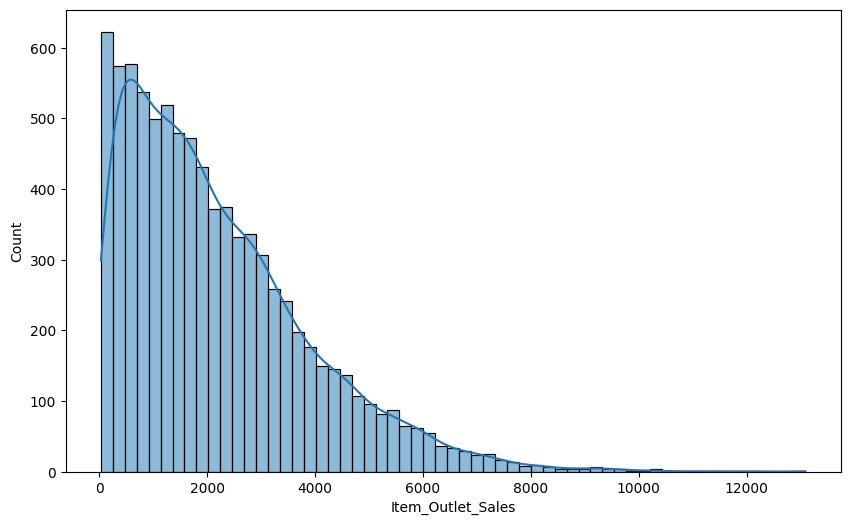

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.show()

Analysis:
The distribution of Item_Outlet_Sales is right-skewed (positively skewed).
Most sales are concentrated between ₹0 and ₹2000, with frequency steadily decreasing as sales increase.
There are a few outliers with very high sales values (₹10,000+), but these are rare.
The distribution shape suggests that a large number of items have low to moderate sales, while only a small number of items have high sales.

Conclusion:
The majority of products sold at Blinkit outlets have lower sales figures, with high-selling items being relatively rare. This right-skewed distribution indicates that sales are driven by a few high-performing items, while most products contribute moderately to overall revenue.




IDENTIFYING TOP SELLING ITEMS


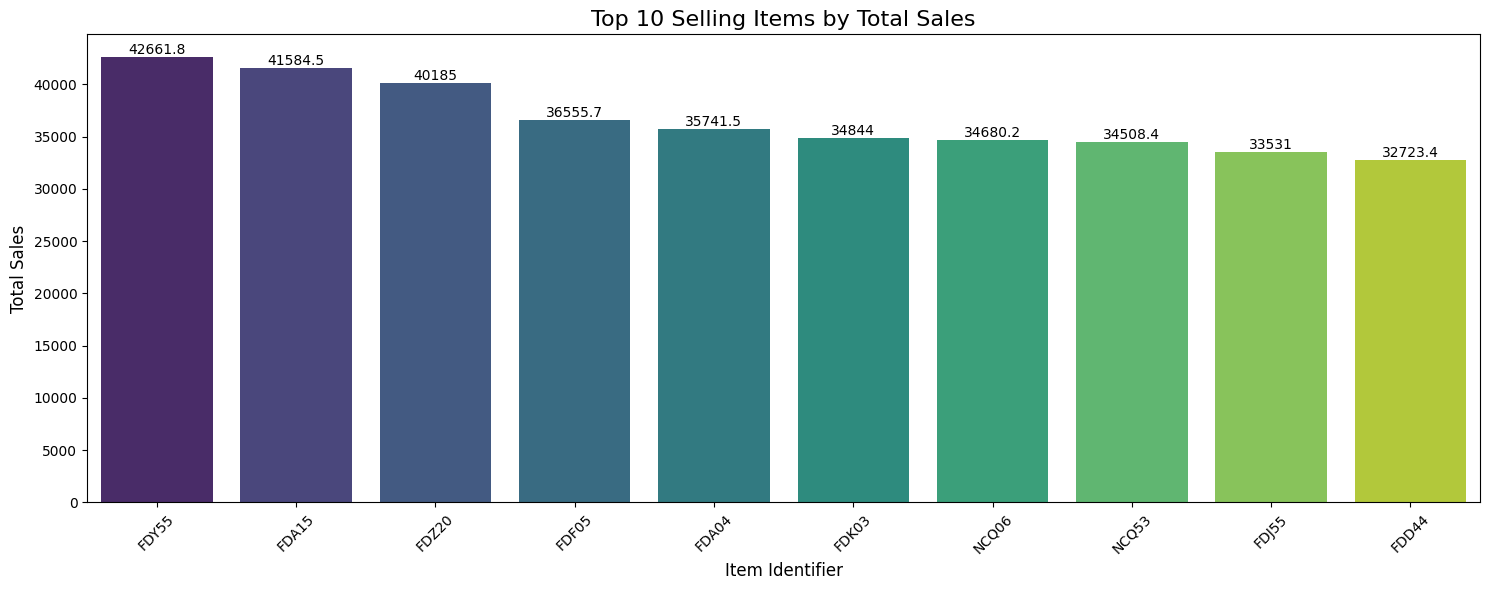

In [14]:
# Identifying Top Selling Items

top_selling_items = (df.groupby(['Item_Identifier'], as_index=False)['Item_Outlet_Sales']
                       .sum()
                       .sort_values(by='Item_Outlet_Sales', ascending=False)
                       .head(10))

plt.figure(figsize=(15, 6))
plt.clf()
ax = sns.barplot(x='Item_Identifier', y='Item_Outlet_Sales', data=top_selling_items, palette='viridis')

ax.set_title('Top 10 Selling Items by Total Sales', fontsize=16)
ax.set_xlabel('Item Identifier', fontsize=12)
ax.set_ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

From above graphs we can see that the Top Selling Items with the Identifiers are: FDY55, FDA15, FDZ20, FDF05, FDA04, FDK03, NCQ06, NCQ53, FDJ55 and FD44

Calculate and Analyze Outlet Age

In [15]:
from datetime import datetime
current_year = datetime.now().year  


df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']


print(df['Outlet_Age'].describe())

count    8523.000000
mean       27.168133
std         8.371760
min        16.000000
25%        21.000000
50%        26.000000
75%        38.000000
max        40.000000
Name: Outlet_Age, dtype: float64


The dataset contains data for 8,523 outlets. The youngest outlet is 15 years old, while the oldest is 40 years old. The majority of outlets are relatively mature (20–37 years old). Older outlets (37+ years) may represent well-established locations, which could be leveraged for strategies like branding or loyalty programs.

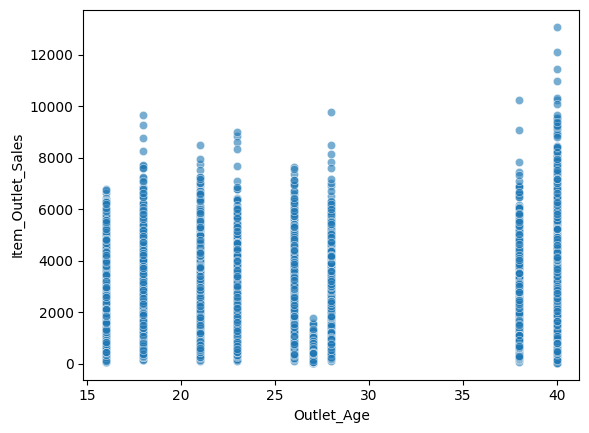

<Figure size 1000x600 with 0 Axes>

In [16]:
sns.scatterplot(x='Outlet_Age', y='Item_Outlet_Sales', data=df, alpha=0.6)
plt.figure(figsize=(10,6))
plt.show()

Analysis:
There is no strong linear relationship between Outlet_Age and Item_Outlet_Sales.
Sales are spread across all outlet ages, including newer outlets (age ~15) and older ones (age ~40).
Slightly higher concentrations of very high sales appear in some older outlets (ages ~38–40), but this is not consistent across the range.
The variation in sales seems more dependent on other factors than age alone.

Conclusion:
Outlet age does not appear to be a strong predictor of item sales. Both new and old outlets can have high or low sales, suggesting that factors like location, product assortment, or customer base may play a more significant role in determining outlet performance.

Average Sales By Outlet Type

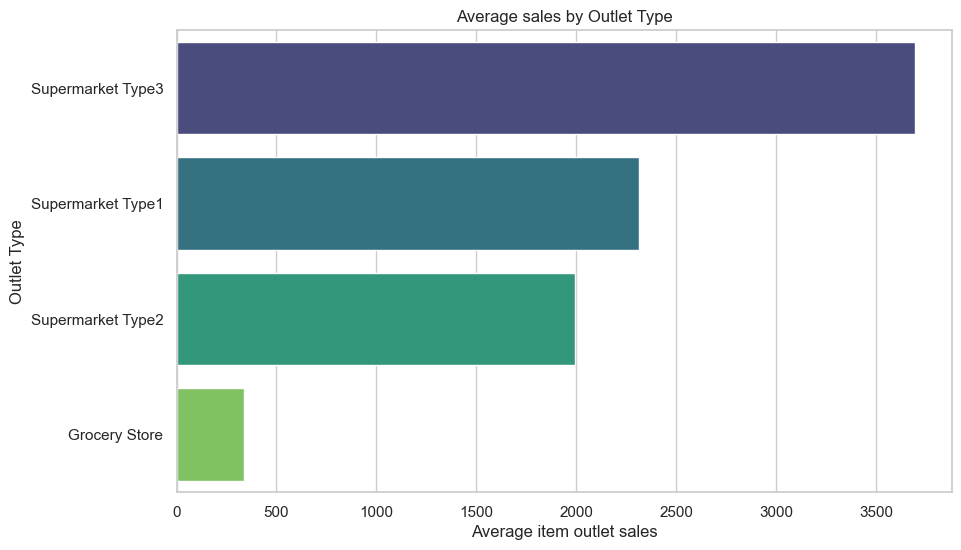

In [17]:
avg_sales_by_outlet = df.groupby(['Outlet_Type'], as_index = False)['Item_Outlet_Sales'].mean().sort_values(by ='Item_Outlet_Sales', ascending = False)
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x = 'Item_Outlet_Sales', y = 'Outlet_Type', data = avg_sales_by_outlet, palette ='viridis' )
plt.title('Average sales by Outlet Type')
plt.xlabel('Average item outlet sales')
plt.ylabel('Outlet Type')
plt.show()

Analysis:
Supermarket Type 3 has the highest average sales per item outlet, significantly outperforming other outlet types.
Supermarket Types 1 and 2 have moderate and comparable average sales.
Grocery Stores have the lowest average sales by a large margin, indicating weaker performance.


Conclusion:
Among all outlet types, Supermarket Type 3 drives the highest average item sales, suggesting it may benefit from better infrastructure, more footfall, or a wider product range. In contrast, Grocery Stores underperform considerably, indicating limited sales potential or lower demand at these outlets.

Average Sales By Outlet Location

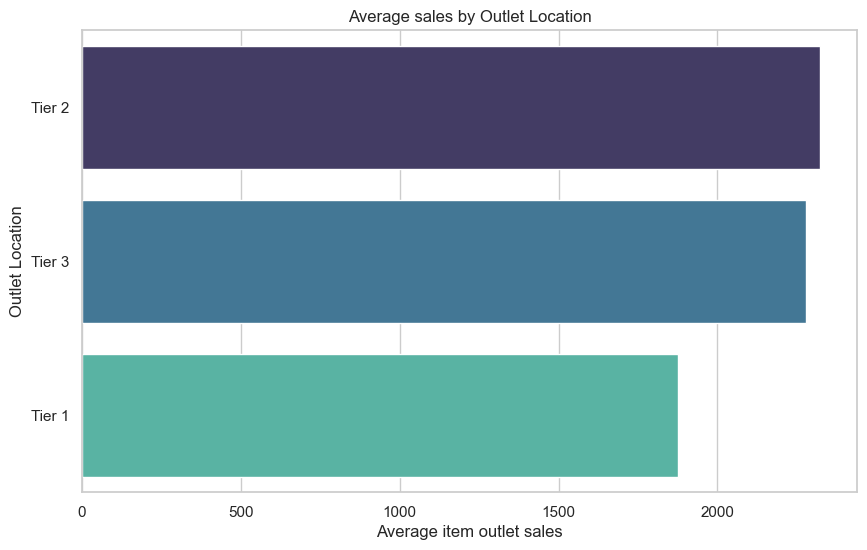

In [18]:
avg_sales_by_location= df.groupby(['Outlet_Location_Type'], as_index = False)['Item_Outlet_Sales'].mean().sort_values(by ='Item_Outlet_Sales', ascending = False)
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x = 'Item_Outlet_Sales', y = 'Outlet_Location_Type', data = avg_sales_by_location, palette ="mako" )
plt.title('Average sales by Outlet Location')
plt.xlabel('Average item outlet sales')
plt.ylabel('Outlet Location')
plt.show()

Analysis:
Outlets in Tier 2 and Tier 3 locations have higher average item sales compared to Tier 1.
Tier 2 leads slightly, followed closely by Tier 3.
Tier 1 locations have the lowest average item sales.



Conclusion:
 Tier 2 and Tier 3 locations outperform Tier 1 in average item outlet sales, This suggests that non-metro markets may offer higher sales potential for certain products.

Distribution Of Item Fat Content

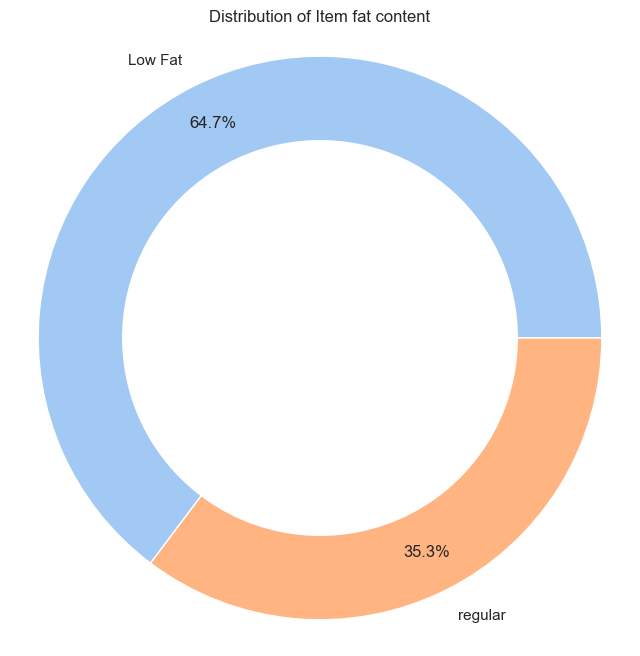

In [ ]:
# Replacing the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_mapping)
fat_content_counts = df['Item_Fat_Content'].value_counts()
labels = fat_content_counts.index
sizes = fat_content_counts.values
plt.figure(figsize=(8,8))
colors = sns.color_palette("pastel")
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Item fat content')
plt.show()

Analysis:
A majority of the items sold are labeled as Low Fat, making up 64.7% of the total.
Regular fat content items account for the remaining 35.3%.
The chart reflects a clear preference or focus on healthier (low-fat) options in the product assortment.



Conclusion:
Over two-thirds of the products sold are low-fat, indicating either a strategic push by Blinkit toward healthier food options or a higher demand from consumers for low-fat products. This insight could inform future stocking and marketing decisions around health-conscious offerings.

Analysing the age of the Outlets impact their sales

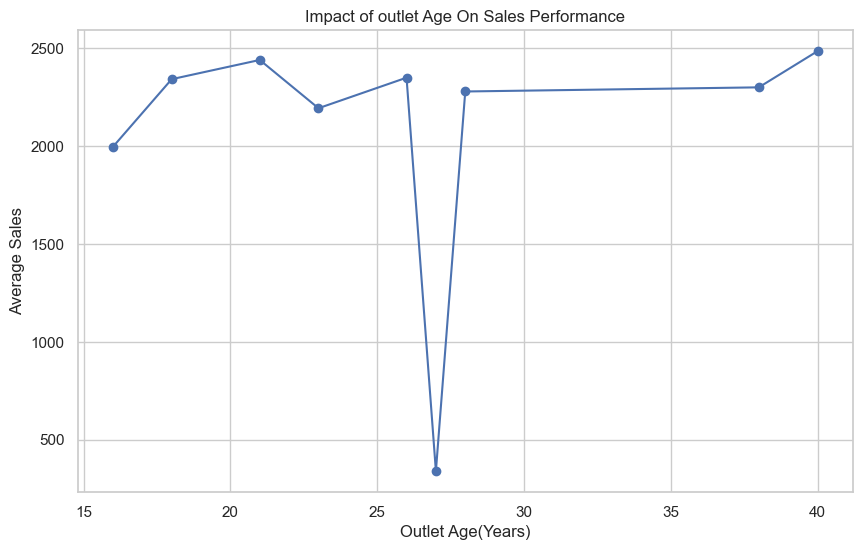

In [20]:
age_sales= df.groupby('Outlet_Age')['Item_Outlet_Sales'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(age_sales['Outlet_Age'], age_sales['Item_Outlet_Sales'], marker='o', linestyle='-' )
plt.title('Impact of outlet Age On Sales Performance')
plt.xlabel('Outlet Age(Years)')
plt.ylabel('Average Sales')
plt.show()

Analysis:
Overall, average sales remain fairly stable across different outlet ages, mostly ranging between ₹2000 and ₹2500.
There’s a sharp drop in sales at age ~27, likely due to an outlier outlet or data irregularity.
After this dip, average sales recover quickly and continue to rise, with the highest average sales observed at 40 years.


Conclusion:
Outlet age does not show a strong or consistent influence on average sales, except for an unusual dip around year 27. This outlier may reflect data issues or an underperforming store. Excluding that, older outlets generally perform as well as, or better than, newer ones.

Total Sales by Item Type

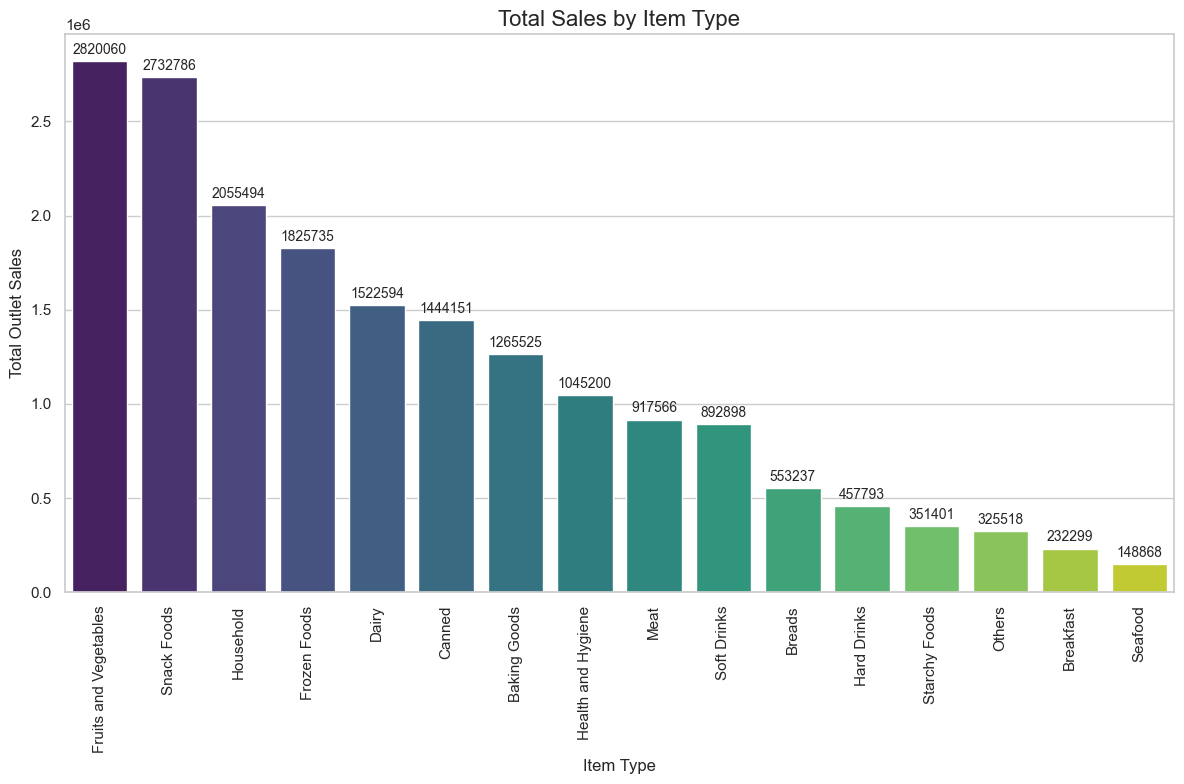

In [21]:
# Total Sales by Item Type
item_sales = (df.groupby('Item_Type')['Item_Outlet_Sales']
              .sum()
              .reset_index()
              .sort_values(by='Item_Outlet_Sales', ascending=False))

# Plot configuration
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=item_sales, x='Item_Type', y='Item_Outlet_Sales', palette='viridis')

# Add value labels on the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=10, padding=3)

# Add title and axis labels
plt.title('Total Sales by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Total Outlet Sales', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Analysis:
Fruits and Vegetables and Snack Foods are the top-selling categories, each generating over ₹2.7 million in total sales.
Household items, Frozen Foods, and Dairy also perform strongly, forming the mid-tier of sales.
Seafood, Breakfast items, and Others contribute the least to total sales, with Seafood having the lowest.


Conclusion:
Sales are heavily concentrated in everyday essentials like produce, snacks, and household items, reflecting core consumer demand. In contrast, niche categories such as Seafood and Breakfast items have significantly lower sales, indicating limited popularity or availability.

Average MRP by Item Type

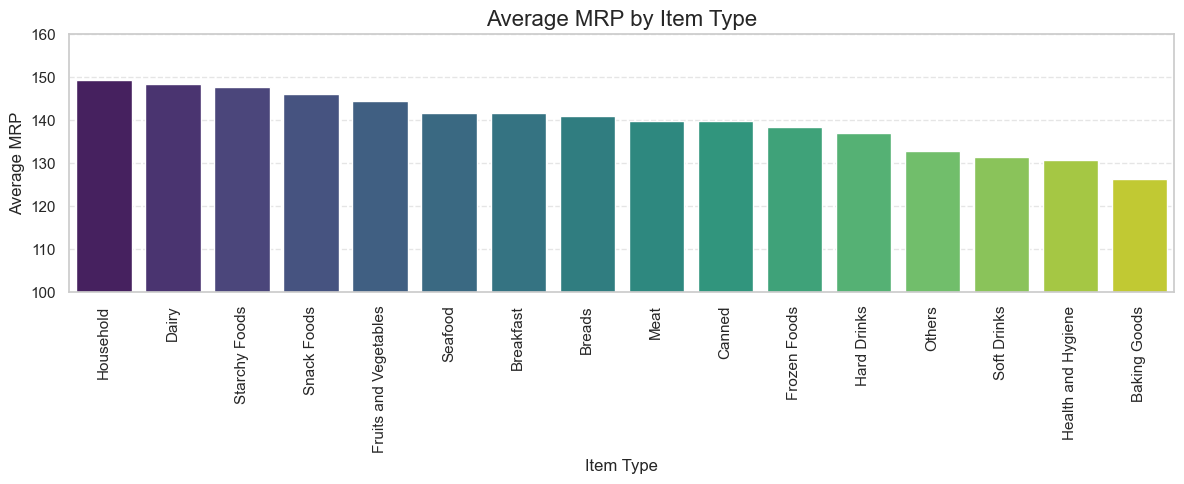

In [22]:
# Average MRP by Item Type
average_mrp = (df.groupby('Item_Type')['Item_MRP']
               .mean()
               .reset_index()
               .sort_values(by='Item_MRP', ascending=False))

# Plot configuration
plt.figure(figsize=(12, 5))
sns.barplot(data=average_mrp, x='Item_Type', y='Item_MRP', palette='viridis')

# Add value labels on the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f', fontsize=10, padding=3)

# Add title and axis labels
plt.title('Average MRP by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Average MRP', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(100, 160)  # Focus range for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Analysis:
Household and Dairy items have the highest average MRPs, close to ₹150.
Categories like Baking Goods, Health and Hygiene, and Soft Drinks have the lowest MRPs, all averaging below ₹130.
Essential categories like Fruits and Vegetables and Staples fall somewhere in the mid-range of the pricing spectrum.


Conclusion:
Household and Dairy products are priced higher on average, likely due to higher production or packaging costs. In contrast, consumables like Baking Goods and Soft Drinks maintain a lower MRP, indicating their affordability and mass consumption nature.

Creating Key Performance Indicators(KPIs)

In [23]:
# Total number of transactions
total_transactions = df['Item_Outlet_Sales'].count()

# Top-selling item type by total sales
top_selling_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().idxmax()

# Sales growth rate (example calculation; you would need date data)
# sales_growth_rate = ((current_period_sales - previous_period_sales) / previous_period_sales) * 100

# Top 5 highest MRP items
top_5_high_mrp = df.sort_values(by='Item_MRP', ascending=False).head(5)[['Item_Type', 'Item_MRP']]

# Displaying additional KPIs
print(f"Total Number of Transactions: {total_transactions}")
print(f"Top-Selling Item Type: {top_selling_item_type}")
print("\nTop 5 High-MRP Items:")
print(top_5_high_mrp)

Total Number of Transactions: 8523
Top-Selling Item Type: Fruits and Vegetables

Top 5 High-MRP Items:
               Item_Type  Item_MRP
5884              Canned  266.8884
4802              Canned  266.8884
4159               Dairy  266.6884
5254  Health and Hygiene  266.6884
5558  Health and Hygiene  266.5884


Analysis:
The dataset includes 8,523 transactions, indicating a sizable volume of customer activity.
Fruits and Vegetables emerged as the top-selling item type, reflecting strong consumer demand for essential, perishable goods.
The highest MRP items are from categories like Canned, Dairy, and Health and Hygiene, all priced around ₹266, suggesting that these categories contain premium products or larger packaging.


Conclusion:
Consumer preference leans heavily toward daily-use essentials like Fruits and Vegetables, while Canned and Health-related items command the highest prices, possibly due to longer shelf life or specialized use. This highlights a mix of high-volume staples and high-value niche products in Blinkit's sales strategy.

Impact of Item Weight on Sales

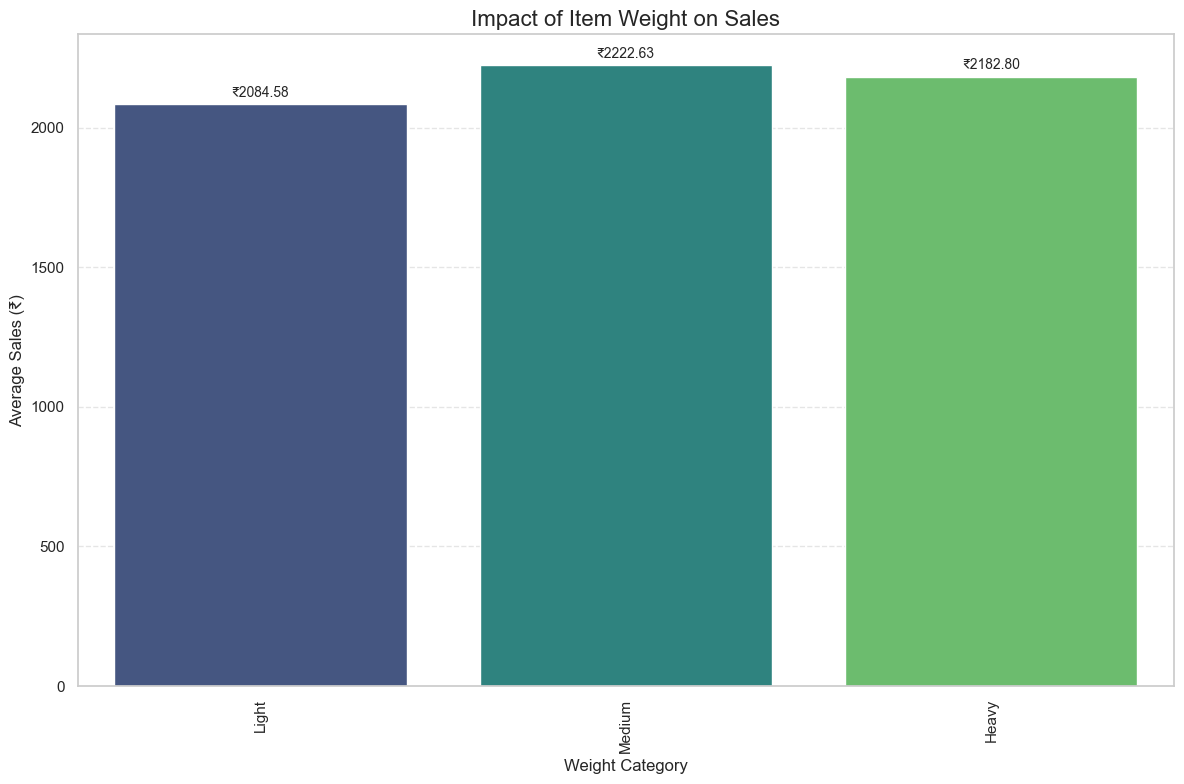

In [24]:
# Grouping items by weight categories
bins = [0, 10, 20, 30]
labels = ['Light', 'Medium', 'Heavy']
df['Weight_Category'] = pd.cut(df['Item_Weight'], bins=bins, labels=labels)

# Average sales by weight category
avg_sales_by_weight = df.groupby('Weight_Category')['Item_Outlet_Sales'].mean().reset_index()

# Plot configuration
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=avg_sales_by_weight, x='Weight_Category', y='Item_Outlet_Sales', palette='viridis')

# Add value labels on the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='₹%.2f', fontsize=10, padding=3)

# Add title and labels
plt.title('Impact of Item Weight on Sales', fontsize=16)
plt.xlabel('Weight Category', fontsize=12)
plt.ylabel('Average Sales (₹)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Analysis:
Items classified as Medium weight have the highest average sales (~₹2222.63).
Heavy items follow closely behind with an average of ~₹2182.80.
Lightweight items have the lowest average sales, at around ₹2084.58.



Conclusion:
Medium-weight products outperform both lighter and heavier items in average sales, suggesting they strike the right balance between value, usability, and consumer preference. This trend indicates that optimizing packaging and pricing around medium-weight categories may enhance sales performance.


Total Sales by Outlet Size

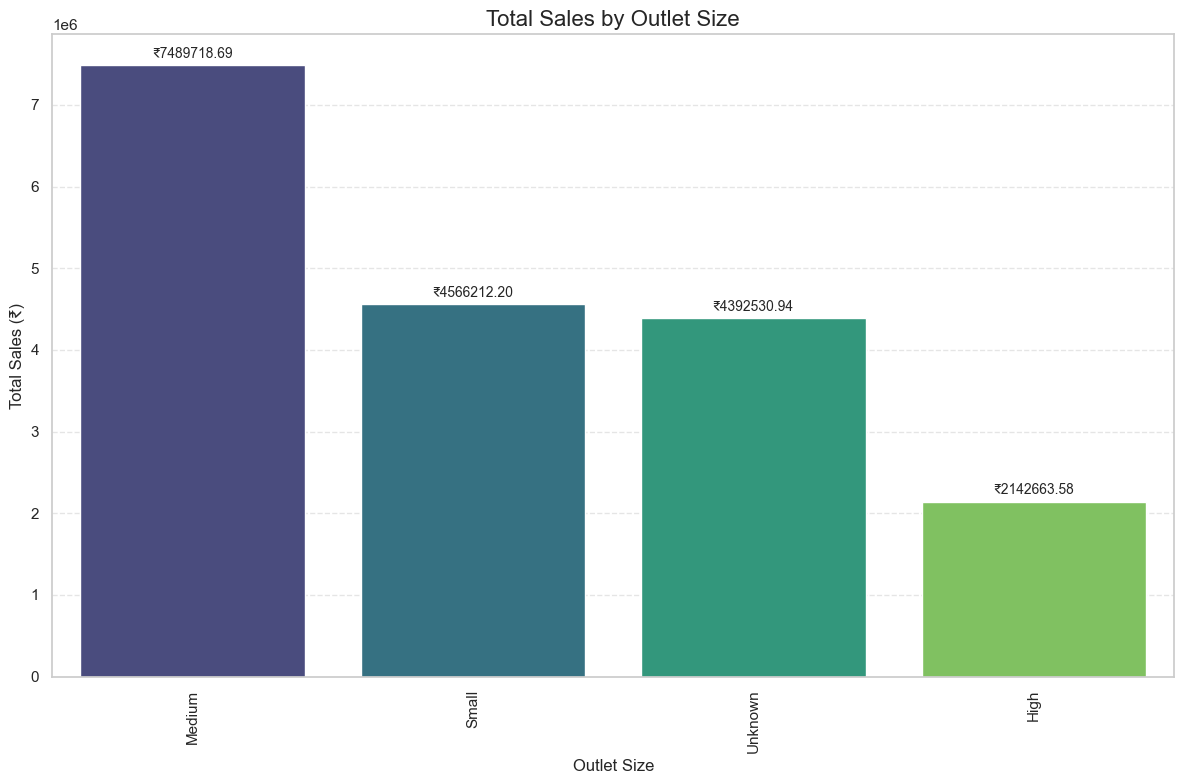

In [25]:
# Calculate total sales by outlet size
total_sales_by_outlet_size = (df.groupby(['Outlet_Size'], as_index=False)['Item_Outlet_Sales']
                             .sum()
                             .sort_values(by='Item_Outlet_Sales', ascending=False)
                             .head(10))

# Plot configuration
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=total_sales_by_outlet_size, x='Outlet_Size', y='Item_Outlet_Sales', palette='viridis')

# Add value labels on the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='₹%.2f', fontsize=10, padding=3)

# Add title and labels
plt.title('Total Sales by Outlet Size', fontsize=16)
plt.xlabel('Outlet Size', fontsize=12)
plt.ylabel('Total Sales (₹)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Analysis:
Medium-sized outlets lead significantly in total sales with approximately ₹74.9 lakhs.
Small outlets and outlets with unknown size have similar sales (~₹45–44 lakhs), showing consistent performance.
Surprisingly, High-sized outlets have the lowest total sales at only ₹21.4 lakhs, which is less than half of medium-sized outlets.



Conclusion:
Medium-sized outlets are the most effective in driving sales, possibly due to optimal operational costs and better customer reach. The unexpectedly low performance of high-sized outlets may point to underutilization of space or operational inefficiencies, warranting deeper investigation.

Count of Items by Outlet Size

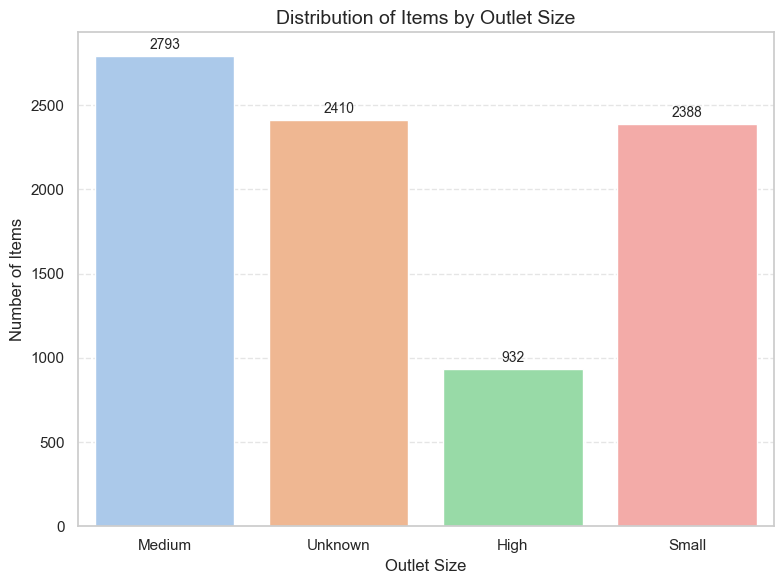

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Outlet_Size', palette='pastel')

# Adding value labels on the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', fontsize=10, padding=3)

# Adding title and labels
plt.title("Distribution of Items by Outlet Size", fontsize=14)
plt.xlabel("Outlet Size", fontsize=12)
plt.ylabel("Number of Items", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Analysis:
The bar chart shows the number of items distributed across outlets of different sizes:
Medium-sized outlets have the highest number of items (2793), suggesting they are a key retail channel.
Unknown outlet size ranks second (2410), indicating missing data that could impact analysis accuracy.
Small outlets also carry a significant number of items (2388), nearly equal to the unknown category.
High-sized outlets have the least number of items (932), which is noticeably lower than all other categories.



Conclusion:
Medium and small outlets dominate in terms of inventory size, making them crucial for product availability and sales.
High outlet size's low item count could imply they are fewer in number, serve niche markets, or operate differently.

Feature Engineering

In [29]:
df['Sales_Per_Item'] = df['Item_Outlet_Sales'] / df['Item_Weight']
df['Price_Per_Weight'] = df['Item_MRP'] / df['Item_Weight']

# Validation of the new features
print(df[['Sales_Per_Item', 'Price_Per_Weight']].describe())

       Sales_Per_Item  Price_Per_Weight
count     8523.000000       8523.000000
mean       192.199201         12.462499
std        171.282516          7.588443
min          2.263720          1.686016
25%         65.628572          6.899532
50%        145.334629         11.056673
75%        268.842596         15.821838
max       1628.784126         50.775731


Observation for the Relationship Between Item MRP and Sales

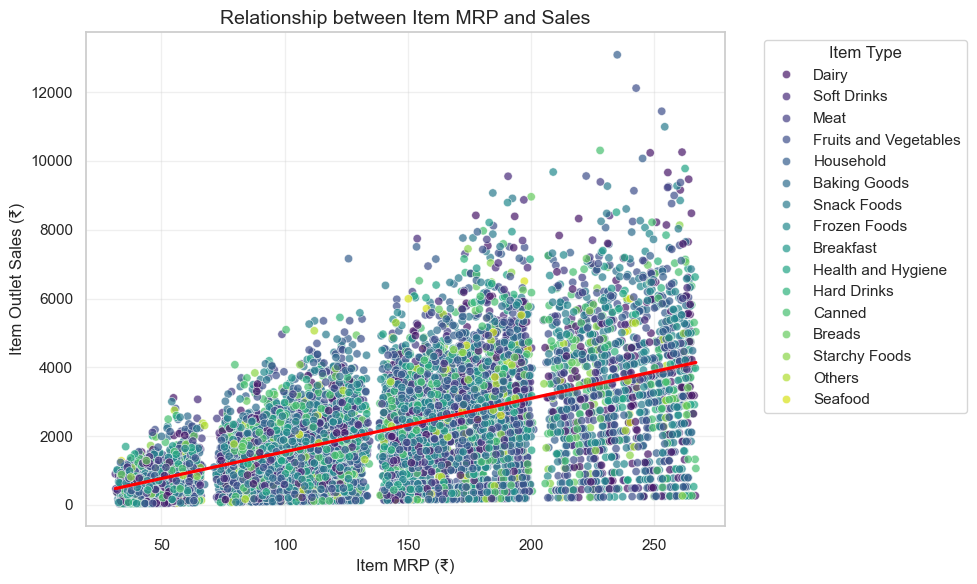

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, hue='Item_Type', alpha=0.7, palette='viridis')

# Adding trend line
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, scatter=False, color='red', line_kws={'label':'Trend Line'})

# Adding title and labels
plt.title('Relationship between Item MRP and Sales', fontsize=14)
plt.xlabel('Item MRP (₹)', fontsize=12)
plt.ylabel('Item Outlet Sales (₹)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Item Type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Analysis:
The scatter plot shows a positive correlation between Item MRP and Outlet Sales, as indicated by the upward-sloping red trend line. This suggests that, generally, higher-priced items tend to generate more sales revenue.
However, there is significant spread at each MRP level, meaning some cheaper items sell better than expensive ones depending on the item type, demand, or consumer preference. For example, categories like Dairy and Soft Drinks appear frequently across different sales ranges.



Conclusion:
While a higher MRP is associated with higher sales, it's not the only factor. Item category and demand also play a key role in influencing sales performance.

Observation for the Relationship Between Item_Visibility and Sales

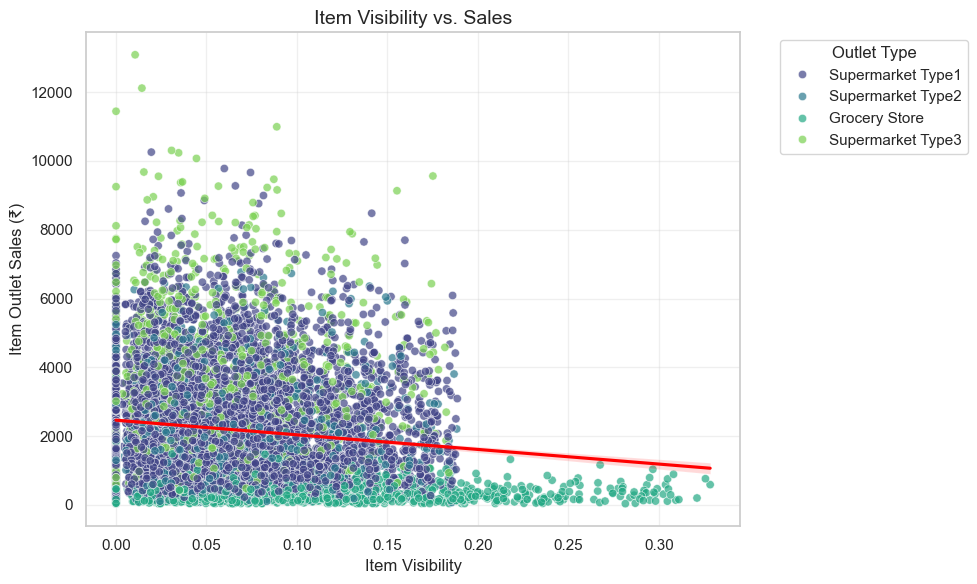

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, hue='Outlet_Type', alpha=0.7, palette='viridis')

# Adding trend line
sns.regplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, scatter=False, color='red', line_kws={'label':'Trend Line'})

# Adding title and labels
plt.title('Item Visibility vs. Sales', fontsize=14)
plt.xlabel('Item Visibility', fontsize=12)
plt.ylabel('Item Outlet Sales (₹)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Outlet Type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Analysis:
This scatter plot shows the relationship between Item Visibility and Sales, segmented by Outlet Type.
There's a slight negative correlation: as visibility increases, sales tend to decrease (shown by the red trend line).
Most high sales occur at low visibility levels, which is counterintuitive.
Across outlet types, especially Supermarket Type1 and Type3, items with lower visibility still perform well.


Conclusion:
Higher item visibility does not necessarily lead to higher sales. This may indicate:
Overexposure or saturation of certain items,
Or that effective marketing, promotions, or product type matter more than just visibility.
Further analysis might help uncover why low-visibility items are still selling well.


Sales Distribution By Outlet Type

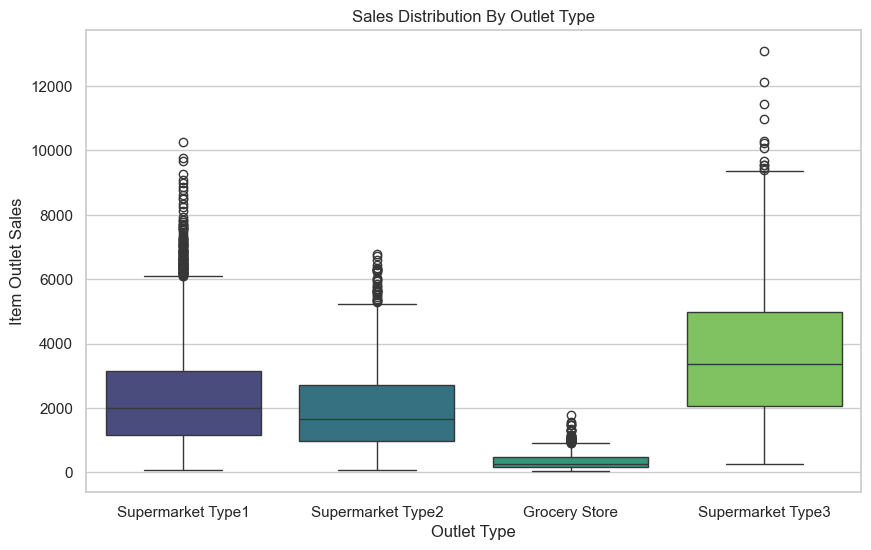

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='viridis')
plt.title('Sales Distribution By Outlet Type')  # Fixed title assignment
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.show()

ANALYSIS:
Supermarket Type3:
Has the highest median sales, indicating strong consistent performance.
Displays the widest interquartile range (IQR), suggesting a greater variation in sales volume across items.
Contains a large number of high-value outliers, meaning certain items perform exceptionally well in these outlets.
The upper whisker is significantly longer, further indicating that some products reach very high sales numbers.



Supermarket Type1 and Type2:
Both have moderate median sales, with Type1 slightly ahead.
Their IQRs are fairly similar, reflecting similar sales variability.
Both show a fair number of outliers, but fewer than Type3.
These outlets appear to be middle performers—reliable but not as high-performing as Type3.


Grocery Store:
Has the lowest median and overall sales distribution.
The IQR is narrow, and the upper whisker is short, showing low variation.
Very few outliers, indicating that items rarely achieve high sales in this outlet type.



Conclusion:
Supermarket Type3 stands out as the most profitable and dynamic outlet type, likely due to better infrastructure, wider product range, or higher customer footfall.
Supermarket Types 1 and 2 are stable but less impactful than Type3.
Grocery Stores consistently underperform, which may reflect limitations in size, inventory, or customer reach.

This suggests that for sales optimization, brands and supply chains should prioritize placement in Supermarket Type3 outlets, while Grocery Stores may require different strategies like bundling, localized marketing, or pricing incentives.

Sales by Outlet Location Type

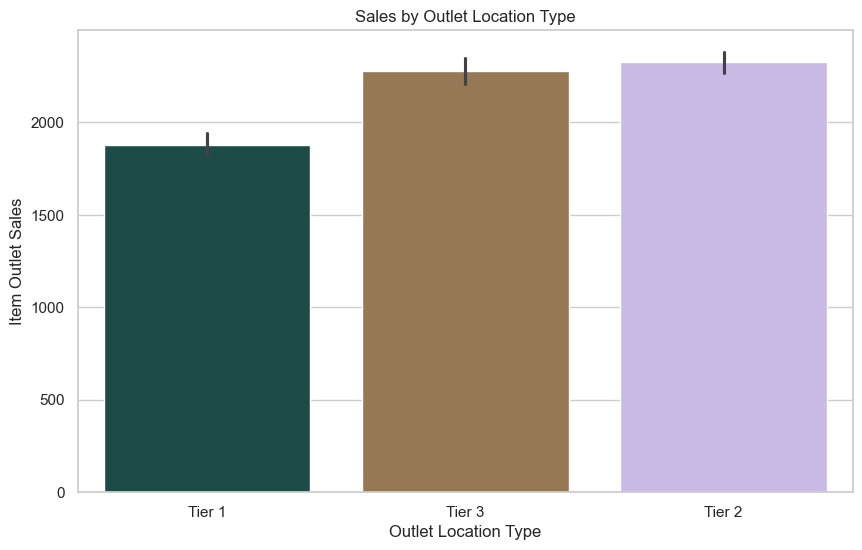

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette='cubehelix')
plt.title('Sales by Outlet Location Type')  # Fixed title assignment
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

Analysis:
Tier 2 and Tier 3 locations have the highest average item sales, slightly outperforming each other.
Tier 1 cities show noticeably lower average sales compared to Tier 2 and Tier 3.
The error bars are small, indicating consistent performance within each tier.



Conclusion:
Sales are higher in Tier 2 and 3 cities, possibly due to less competition, stronger brand loyalty, or more reliance on organized retail. Tier 1 locations underperform, which may reflect customer preferences for alternative retail channels or higher market saturation.

Identifying Outliers

In [34]:
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
outliers = df[(df['Item_Outlet_Sales']<lower_bound) |(df['Item_Outlet_Sales']>upper_bound) ]
print(f"Number of outliers detected : {len(outliers)}")

Number of outliers detected : 186


Visualize the Outliers

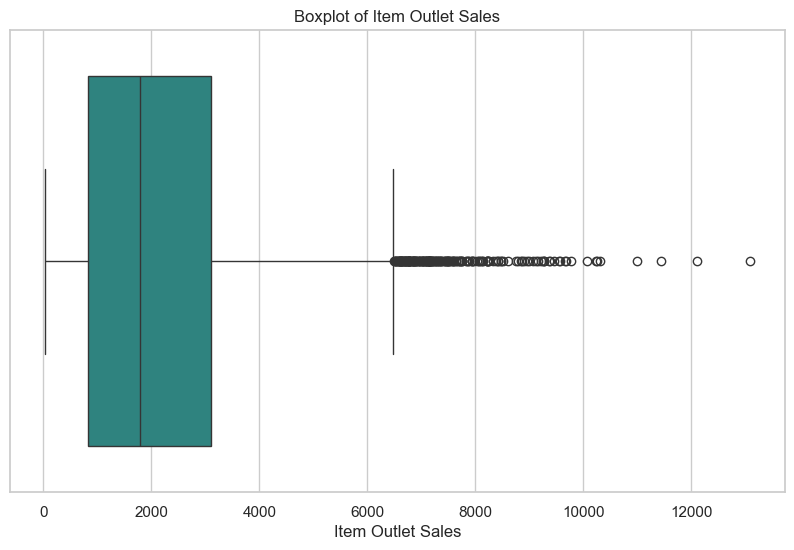

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Outlet_Sales', data=df, palette='viridis')
plt.title('Boxplot of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.show()

Analysis:
The median item sales are around ₹2,000, indicating that half the items sell below this level.
The interquartile range (IQR)—middle 50% of the data—falls roughly between ₹500 and ₹3,500.
A large number of outliers are present beyond ₹6,000, with some reaching above ₹12,000.
The box is left-skewed, showing that most items have lower sales, while a small portion performs exceptionally well.



Conclusion:
Item sales are heavily right-skewed—a few products drive very high sales, while most have moderate to low performance. This suggests:
The need to identify and focus on high-performing items,
And consider promotional strategies or optimizations for lower-performing ones to balance overall sales.



Building a Linear Regression Model to analyse how changes in Item_MRP affect sales

In [36]:
X_mrp = df[['Item_MRP']]
y_sales = df['Item_Outlet_Sales']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_mrp,y_sales, test_size=0.2, random_state=42)

In [39]:
model_mrp_sales = LinearRegression()
model_mrp_sales.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_pred = model_mrp_sales.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Effect of MRP on Sales (Slope): {model_mrp_sales.coef_[0]:.4f}")
rmse = np.sqrt(1818215.3219)
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 0.3310
Mean Squared Error: 1818215.3219
Effect of MRP on Sales (Slope): 15.5455
Root Mean Squared Error: 1348.41


Conclusion:
The R-squared value of 0.3310 indicates that about 33% of the variation in sales can be explained by the item’s MRP. This suggests a moderate correlation — MRP impacts sales, but other factors also play a major role.
The slope (15.55) means that, on average, for every ₹1 increase in MRP, sales increase by ₹15.55. This reflects a positive relationship, though not very strong.
The Root Mean Squared Error (RMSE) of ₹1348.41 shows a relatively high average error, indicating that the model's predictions can deviate significantly from actual sales values.
Similarly, a high Mean Squared Error further confirms the presence of variability that MRP alone doesn't account for.



Interpretation:
While MRP does influence sales to an extent, sales are driven by multiple factors such as item type, visibility, outlet characteristics, promotions, or consumer behavior. 



Recommendations for the Company:
1)To not rely solely on pricing ,Since MRP explains only ~33% of sales, focus should also be on other drivers like promotions, visibility, and outlet type.
2) To Improve targeting of high-MRP items , they tend to generate more revenue; they need to be marketed more  strategically.
3) To Analyze low-performing products using additional variables (item type, location, visibility) to identify why some products underperform.





Building a Random Forest Classifier to Identify Underperforming Outlets

In [44]:
df_encoded = df.copy()

In [45]:
underperform_threshold = df_encoded['Item_Outlet_Sales'].median()
df_encoded['Underperforming'] = (df_encoded['Item_Outlet_Sales'] < underperform_threshold).astype(int)

In [46]:
le_outlet_size = LabelEncoder()
le_outlet_type = LabelEncoder()

In [47]:
df_encoded['Outlet_Size_Encoded'] = le_outlet_size.fit_transform(df_encoded['Outlet_Size'])
df_encoded['Outlet_Type_Encoded'] = le_outlet_type.fit_transform(df_encoded['Outlet_Type'])

In [48]:
# Features and Target for Outlet Performance model
X_outlet = df_encoded[['Outlet_Size_Encoded', 'Outlet_Type_Encoded', 'Outlet_Establishment_Year', 'Item_MRP', 'Item_Visibility']]
y_outlet = df_encoded['Underperforming']  

In [49]:
X_train_outlet, X_test_outlet, y_train_outlet, y_test_outlet = train_test_split(X_outlet, y_outlet, test_size=0.2, random_state=42)

In [50]:
#Training the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_outlet, y_train_outlet)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
y_pred_outlet = rf_classifier.predict(X_test_outlet)

In [52]:
accuracy = accuracy_score(y_test_outlet, y_pred_outlet)
print(f"Outlet Performance Model Accuracy: {accuracy:.4f}")

Outlet Performance Model Accuracy: 0.8006


In [53]:
feature_importances = pd.DataFrame({
    'Feature': X_outlet.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [54]:
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                     Feature  Importance
3                   Item_MRP    0.553466
4            Item_Visibility    0.237413
1        Outlet_Type_Encoded    0.147150
2  Outlet_Establishment_Year    0.040033
0        Outlet_Size_Encoded    0.021937


Analysis:
Item MRP (55.3%) is the most influential factor, meaning price plays a significant role in determining whether an outlet underperforms.
Item Visibility (23.7%) is the second most important factor, suggesting that how prominently items are displayed or promoted heavily affects outlet performance.
Outlet Type (14.7%) also contributes meaningfully—certain types of outlets are more likely to underperform than others.
Outlet Establishment Year (4%) has a minor influence, possibly reflecting limited effect of outlet age on performance.
Outlet Size (2.2%) is the least important, implying that size alone doesn't significantly affect performance.



Conclusion:
Outlet performance is primarily influenced by item-level factors (MRP and visibility), while outlet characteristics like type, size, or age play a smaller role. This highlights that product strategy matters more than outlet infrastructure in driving performance.




Recommendations for the Company:
Re-evaluate pricing strategy – Optimize MRP, especially in underperforming outlets, to better align with local demand and competitor pricing.

Increase item visibility – Boost product visibility through better in-store placement, signage, and digital promotions in lower-performing outlets.

Deprioritize outlet size upgrades – Since size has minimal impact, avoid investing heavily in physical expansions unless tied to other benefits.

Use model insights to prioritize interventions – Focus efforts on outlets where visibility and pricing improvements are likely to yield the biggest impact.





BUILDING A RANDOM FOREST REGRESSOR MODEL TO PREDICT ITEMS WITH LOW VISIBILITY THAT COULD HAVE HIGH SALES

In [56]:
# Features: Visibility and MRP
X_visibility = df[['Item_Visibility', 'Item_MRP']]
y_sales_visibility = df['Item_Outlet_Sales']

In [57]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visibility, y_sales_visibility, test_size=0.2, random_state=42)

In [58]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_vis, y_train_vis)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
y_pred_vis = rf_model.predict(X_test_vis)

In [60]:
mse_vis = mean_squared_error(y_test_vis, y_pred_vis)
r2_vis = r2_score(y_test_vis, y_pred_vis)
print(f"R-squared (Visibility Model): {r2_vis:.4f}")
print(f"Mean Squared Error (Visibility Model): {mse_vis:.4f}")

R-squared (Visibility Model): 0.2494
Mean Squared Error (Visibility Model): 2040118.2362


In [61]:
# Identifying low visibility, high predicted sales items
low_visibility_threshold = 0.05
high_sales_threshold = y_sales.mean() * 1.5 

In [62]:
low_vis_high_sales = X_test_vis[(X_test_vis['Item_Visibility'] < low_visibility_threshold) & (y_pred_vis > high_sales_threshold)]
print("Items with Low Visibility but High Predicted Sales:")
print(low_vis_high_sales)

Items with Low Visibility but High Predicted Sales:
      Item_Visibility  Item_MRP
4313         0.029107  240.5222
2112         0.043852  182.6950
4087         0.000000  228.4668
4562         0.048207  188.0556
4983         0.014457  184.7950
...               ...       ...
2127         0.019537  170.0474
3265         0.019019  238.7248
1691         0.000000  196.3426
4824         0.013665  257.7304
4205         0.038532  210.6586

[156 rows x 2 columns]


Model Performance:
R² = 0.2494 → About 25% of the variation in sales is explained by the input features. This is modest, but useful for initial targeting.

MSE = 2,040,118 → Reflects the squared average prediction error;acceptable for identifying broad trends.




Conclusion:
The model has successfully identified low visibility items with high sales potential. These products are currently underexposed, yet hold strong value, meaning:
Their current sales are being limited by lack of visibility.
Boosting visibility could directly increase overall revenue.
This insight supports the idea that visibility plays a crucial but under-optimized role in product performance.





Recommendations for the Company:
Promote Hidden Performers:
Highlight the identified products through banners, featured listings, or in-store placement to unlock their full sales potential.

Reallocate Shelf/Screen Space:
Shift visibility from consistently low-performing items to these high-potential, low-visibility ones.

Run A/B Visibility Tests:
Test different placements or promotions for these products in select outlets to measure sales lift directly.

Train Outlet Managers:
Inform local managers or staff about these hidden performers so they can prioritize their visibility during stock arrangement or customer interactions.


